# **Pipeline 10 Modeling**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [3]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_csv('Final10', header=0, index_col=0)
# Checking import 
df.head(5)

,X2,X3_Bins,X4_Bins,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X15_ABS,X16_ABS,X17_ABS,X18,X19,X20,X21,X22,X23,Y
0,2,1,1,0,1,1,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.394187,0.000000,0.000000,0.000000,0.000000,1
1,2,1,0,0,0,1,0,0,0,1,...,0.290992,0.304196,0.299765,0.000000,0.446302,0.454190,0.470780,0.000000,0.588415,1
2,2,1,0,1,0,0,0,0,0,0,...,0.476104,0.495677,0.504543,0.516562,0.510888,0.454190,0.470780,0.468896,0.798602,0
3,2,1,1,1,0,0,0,0,0,0,...,0.597415,0.617920,0.624935,0.566293,0.564080,0.482649,0.485977,0.479441,0.467025,0
4,1,1,1,2,0,0,0,0,0,0,...,0.540258,0.538308,0.540642,0.566293,0.763165,0.978523,0.979261,0.414142,0.410485,0


# **Splitting and Resampling Data**

In [4]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

# **Logistic Regression**

In [7]:
cols = df.columns.values
print(cols)

['X2' 'X3_Bins' 'X4_Bins' 'X5_Bins' 'X6_BI' 'X7_BI' 'X8_BI' 'X9_BI'
 'X10_BI' 'X11_BI' 'X12_BI' 'X13_BI' 'X14_BI' 'X15_BI' 'X16_BI' 'X17_BI'
 'X12_M' 'X13_M' 'X14_M' 'X15_M' 'X16_M' 'X17_M' 'X1' 'X12_ABS' 'X13_ABS'
 'X14_ABS' 'X15_ABS' 'X16_ABS' 'X17_ABS' 'X18' 'X19' 'X20' 'X21' 'X22'
 'X23' 'Y']


In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [9]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4740, 1166],
       [ 609,  985]])

Text(0.5, 257.44, 'Predicted label')

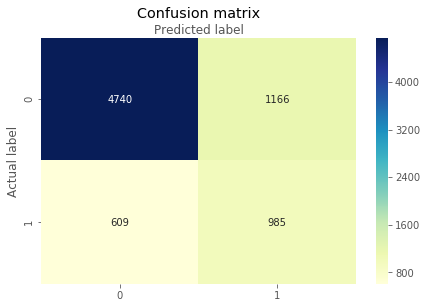

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7633333333333333
F1_Score: 0.7750770322718656
AUC: 0.7102579687373196


# **Decision Tree**

In [12]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7241333333333333
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      5906
           1       0.37      0.42      0.39      1594

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.60      0.61      0.61      7500
weighted avg       0.74      0.72      0.73      7500

[[4767 1139]
 [ 930  664]]


In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7241333333333333
F1_Score: 0.7301351288011664
AUC: 0.6118536919475802


# **Feature Importance**

In [14]:
feature_importance = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns).sort_values(ascending=False)
feature_importance

X6_BI      0.157991
X19        0.076090
X1         0.074272
X12_ABS    0.070557
X18        0.059913
X23        0.058058
X17_ABS    0.056400
X15_ABS    0.053059
X21        0.052892
X20        0.051553
X16_ABS    0.049163
X14_ABS    0.047832
X13_ABS    0.047352
X22        0.043627
X5_Bins    0.022648
X12_BI     0.013334
X4_Bins    0.010487
X3_Bins    0.010010
X9_BI      0.009959
X2         0.008774
X8_BI      0.007065
X11_BI     0.006507
X10_BI     0.003489
X7_BI      0.003103
X17_BI     0.001546
X15_BI     0.001195
X14_BI     0.001099
X13_BI     0.001067
X16_BI     0.000957
X12_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X13_M      0.000000
dtype: float64

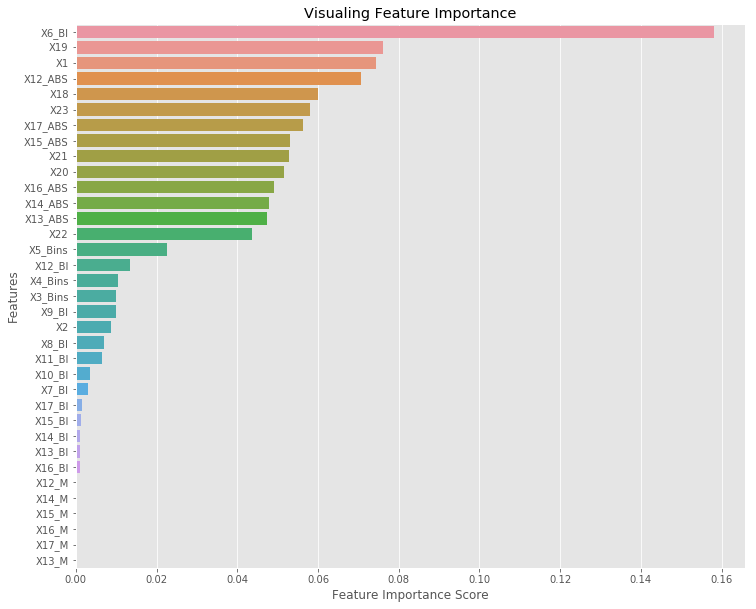

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualing Feature Importance")

plt.show()

# **SVM Gaussian Kernel**

In [16]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', gamma='auto')  #Kernel=rbf, non-linearly separable data
svclassifier = svclassifier.fit(X_train_resample, y_train_resample) 

In [17]:
y_pred = svclassifier.predict(X_test)  

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4877 1029]
 [ 638  956]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5906
           1       0.48      0.60      0.53      1594

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.68      0.71      0.69      7500
weighted avg       0.80      0.78      0.79      7500



In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7777333333333334
F1_Score: 0.7860698016934684
AUC: 0.7127597309755811


# **K-Neighbors Classifier**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier()
kneigh = kneigh.fit(X_train_resample, y_train_resample)
y_pred = kneigh.predict(X_test)

In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.6644
F1_Score: 0.6927205289366812
AUC: 0.6540819769020383


# **ADA Classifier**

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(n_estimators=70, random_state=2019)
ADA = ADA.fit(X_train_resample, y_train_resample)
y_pred = ADA.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7606666666666667
F1_Score: 0.7735060381818151
AUC: 0.7133741243513497


In [24]:
# **Random Forest** 

In [25]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100)

#clf.fit(X_train_resample, y_train_resample)

#y_pred = clf.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
#print("AUC:",roc_auc_score(y_test, y_pred))